In [1]:
!pip3 install ipython-autotime
%load_ext autotime


import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
tqdm.pandas()

from termcolor import colored
import os
import nltk
nltk.download('punkt')
# os.environ["TOKENIZERS_PARALLELISM"] = "false"

# nb_workers=10
# my_dir='/content/drive/MyDrive/Next_Door/'


import os
from datetime import datetime
import pickle
import ast
from collections import Counter

def tags_to_counter(tags_list_x):
  tags_list_x = tags_list_x.split(',')
  tags_list_x = Counter(tags_list_x)
  return tags_list_x





def counter_updator(counter_x, counter_base = all_tags_base_counter):
  counter_base_=counter_base.copy()
  counter_base_.update(counter_x)
  return counter_base_


def top_k_percent_keys(counter,k):
    total_items = len(counter)
    threshold = int(total_items * k)
    sorted_counter = counter.most_common()
    top_keys = []
    count = 0
    for key, value in sorted_counter:
        count += 1
        top_keys.append(key)
        if count >= threshold:
            break
    return top_keys

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NameError: ignored

time: 7.81 s (started: 2023-05-08 14:26:18 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 18.2 s (started: 2023-05-06 14:54:38 +00:00)


In [ ]:
model = 'gpt-3.5-turbo'
query_type = 'questionmark'


query_file_path = f'.../Datasets/Query-Results/Kialo - Open AI/kialo_{query_type}_{model}.csv'
answers_df = pd.read_csv(query_file_path)
# answers_df['tags_counter'] = meta_data_df['tags_counter']
answers_df['position'] = answers_df['answer_translated'].map(get_yes_or_no_status)

time: 1.33 s (started: 2023-05-06 14:58:02 +00:00)


In [ ]:
def get_arguments(text):
    # Tokenize the text into sentences
    text = text.lower()
    if re.match("^((yes)|(no)|(not)).*", text):
      return 'One-sided'
    else:
      text = re.sub(r'^[^.]*?\. ','',text)
      text = re.sub('(?i)^however','',text)
    
    
    # Define regular expressions to identify arguments for both sides
    regex_for_support = r'\b(pro|pros|support|agree|in favor of|supporters|advocates|positive)\b'
    regex_for_oppose = r'\b(con|cons|oppose|disagree|against|opponents|negative)\b'

    if re.search(regex_for_support, text) and re.search(regex_for_oppose, text):
      return 'Two-sided'
    if re.search('however|others|on the other hand|on the opposite side', text):
      return 'Two-sided'
    if len(re.findall('arguments', text))>=2:
      return 'Two-sided'
    else:
      return 'One-sided'
    

time: 828 µs (started: 2023-05-06 16:39:05 +00:00)


In [ ]:
query_type = 'questionmark'

meta_data_df = pd.read_excel('.../Datasets/Meta-Data/Kialo_MetaData_popular.xlsx')




meta_data_df['tags_counter']=meta_data_df['tags_list_translated'].map(tags_to_counter)
all_tags_sum_counter = meta_data_df['tags_counter'].sum()
all_tags_base_counter = all_tags_sum_counter.copy()
for key in all_tags_base_counter:
    all_tags_base_counter[key] = 0
meta_data_df['tags_counter']=meta_data_df['tags_counter'].apply(lambda x: counter_updator(counter_x = x, counter_base = all_tags_base_counter)) 

agg_dfs_dict = {}

query_file_path = f'.../Datasets/Query-Results/Kialo - Open AI/kialo_{query_type}_{model}.csv'
answers_df = pd.read_csv(query_file_path)
answers_df['tags_counter'] = meta_data_df['tags_counter']
answers_df['position'] = answers_df['answer_translated'].map(get_arguments)

position_df = answers_df.groupby('position',as_index=False)['tags_counter'].sum()
position_df['tags_counter']=position_df['tags_counter'].apply(lambda x: counter_updator(counter_x = x, counter_base = all_tags_base_counter))
agg_dfs_dict[model] = position_df

time: 6.07 s (started: 2023-05-06 18:09:17 +00:00)


In [ ]:
# answers_df['position'] = answers_df['answer_translated'].map(get_arguments)
answers_df[answers_df['position']=='One-sided'][['initial_claim','answer_translated','position']].sample(10)

,initial_claim,answer_translated,position
1811,Antisemitism problems on 'the left' are exacer...,"As an AI language model, I cannot make assumpt...",One-sided
1233,Technology can enhance the creative process.,"Yes, technology can enhance the creative proce...",One-sided
1836,Journalists should not publish any information...,"As an AI language model, I do not have persona...",One-sided
837,Labour should replace Keir Starmer as leader.,"As an AI language model, I do not have persona...",One-sided
1056,Faut-il diminuer notre utilisation du numériqu...,"As an IA, I don't have a personal preference w...",One-sided
2623,Was Emperor Norton actually the emperor of the...,"No, Emperor Norton was not actually the empero...",One-sided
61,"In an exclusive relationship, an individual sh...","As an AI language model, I do not have persona...",One-sided
1299,Which distributed ledger technologies are the ...,"As an AI language model, I do not have persona...",One-sided
714,What is the best science fiction (sci-fi) movi...,"As an AI language model, I do not have persona...",One-sided
1910,Asylum-seeking parents should not be separated...,"As an AI language model, I do not have persona...",One-sided


time: 25.3 ms (started: 2023-05-06 18:27:10 +00:00)


In [ ]:
agg_dfs_dict[key]#['tags_counter']

,position,tags_counter
0,One-sided,"{'feminism': 23, 'abortion': 10, 'health': 65,..."
1,Two-sided,"{'feminism': 39, 'abortion': 14, 'health': 98,..."


time: 16 ms (started: 2023-05-06 18:12:39 +00:00)


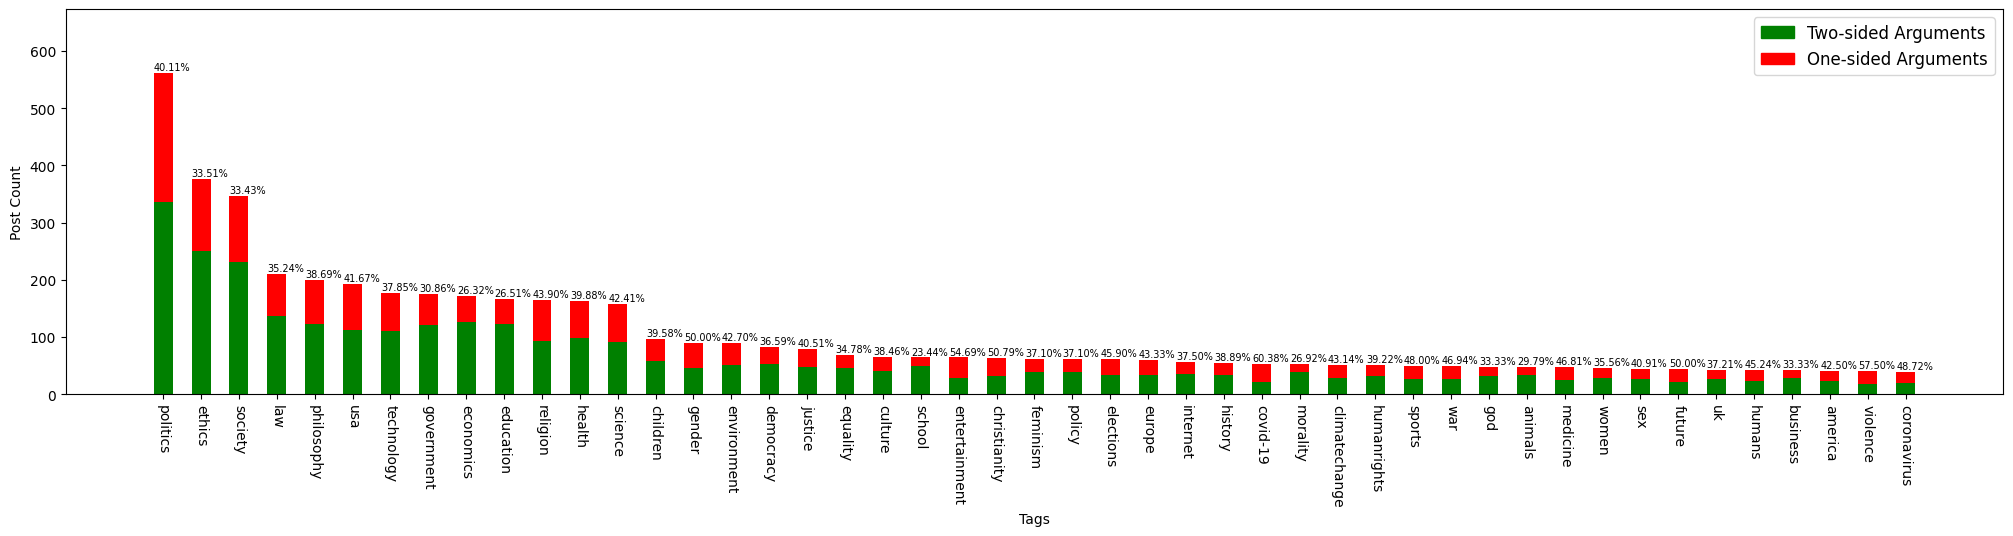

time: 592 ms (started: 2023-05-06 18:31:54 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

keys_that_matter = top_k_percent_keys(all_tags_sum_counter,0.02)
# create lists for the bars and the heights of each stack



# set the width of the bars
bar_width = 0.5

# create the stacked bar chart
fig, ax = plt.subplots(figsize=(25, 5))
x_pos_bar = [i for i, _ in enumerate(keys_that_matter)]
model_number_dict = {}

for n, key in enumerate(agg_dfs_dict):
  model_number_dict[n+1] = key

  heights2 = [agg_dfs_dict[key]['tags_counter'][0][key_i] for key_i in keys_that_matter]
  heights1 = [agg_dfs_dict[key]['tags_counter'][1][key_i] for key_i in keys_that_matter]
  # x_pos_bar_n = [i + (bar_width+0.05)*n + bar_width*0.5 for i in x_pos_bar]
  x_pos_bar_n = [i for i in x_pos_bar]
  ax.bar(x_pos_bar_n, heights1, bar_width, label='Two-sided Arguments',color='green')
  ax.bar(x_pos_bar_n, heights2, bar_width, bottom=heights1, label='One-sided Arguments',color='red')
  height_sum = np.add(heights1, heights2)
  for j,(x_j,y_j) in enumerate(zip(x_pos_bar_n, height_sum)):
    ax.text(x_j-bar_width*0.5, y_j+5, '{:.2%}'.format(heights2[j]/height_sum[j]), color='black',rotation = -0,size=7)

ax.set_xlabel('Tags')
ax.set_ylim([0,max(height_sum)*1.2])
ax.set_xticks([x for x in x_pos_bar])
ax.set_xticklabels(keys_that_matter,size=10)
ax.tick_params(axis='x', labelrotation = -90)
ax.set_ylabel('Post Count')
# ax.set_title('Answer Status')

nonbin_patch = mpatches.Patch(color='green', label='Two-sided Arguments')
bin_patch = mpatches.Patch(color='red', label='One-sided Arguments')
handles = [nonbin_patch,bin_patch]
# for i, label in model_number_dict.items():
#   handles.append(mpatches.Patch(label=f'{i} :{label}', color='white'))



# handles.append(legend_elements)
ax.legend(handles=handles, fontsize=12, loc ="upper right")
# plt.savefig(f".../Charts/AnswerLeaning_stackedbarChart"+".png", bbox_inches = 'tight',format="png", dpi=450)

plt.show()